<a href="https://colab.research.google.com/github/sourav03dutta/YES-Bank-Stock-Closing-Price-Prediction/blob/main/YES_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **YES Bank Stock Closing Price Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **NAME**   - **SOURAV DUTTA**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [193]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from numpy import math
from datetime import datetime
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (train_test_split, GridSearchCV )
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet) 
from sklearn.metrics import (mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score)
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [194]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

working_dir_path = '/content/drive/My Drive/Almabetter Projects/Machine Learning - Regression/YES Bank Stock Closing Price Prediction/'
Stock_Data = pd.read_csv(working_dir_path + 'data_YesBank_StockPrices.csv' , encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [195]:
# Dataset First Look

Stock_Data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [196]:
# Dataset Rows & Columns count

Stock_Data.shape

(185, 5)

### Dataset Information

In [197]:
# Dataset Info

Stock_Data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [198]:
# Dataset Duplicate Value Count

Stock_Data.duplicated().sum()

0

#### Missing Values/Null Values

In [199]:
# Missing Values/Null Values Count

Stock_Data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

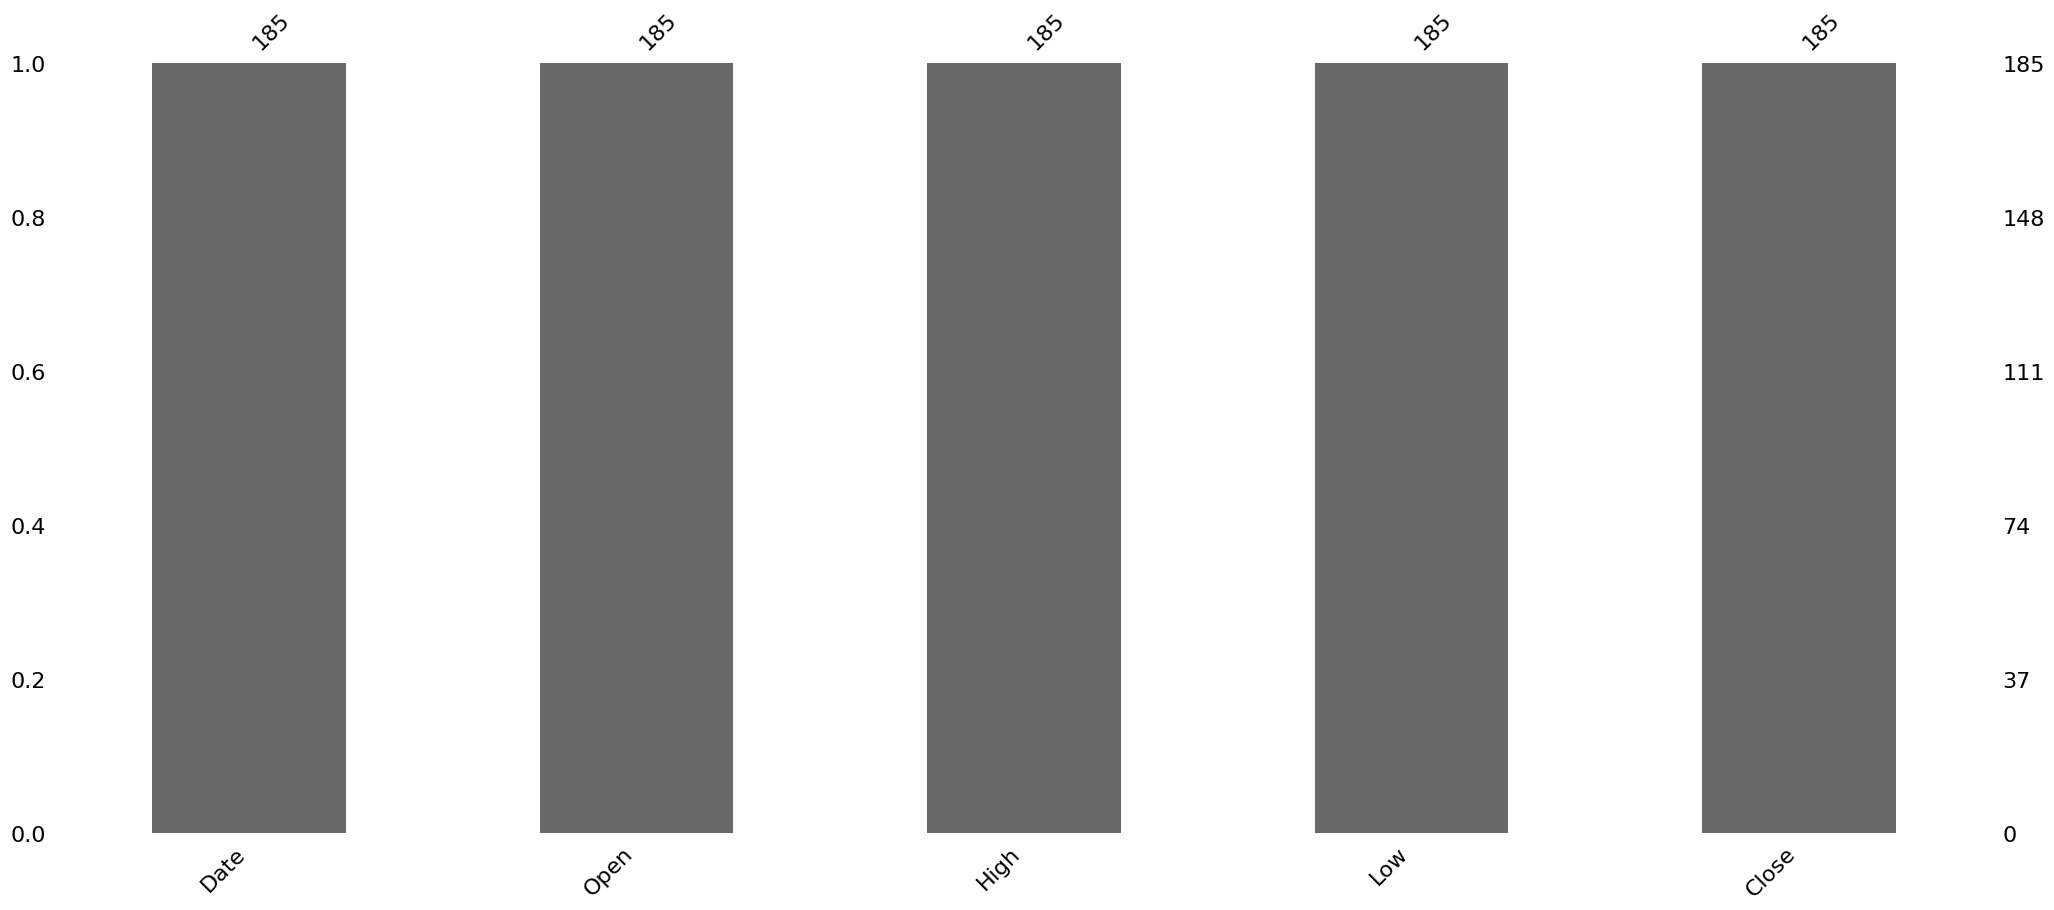

In [200]:
# Visualizing the missing values

msno.bar(Stock_Data)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [201]:
# Dataset Columns

Stock_Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [202]:
# Dataset Describe

Stock_Data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [203]:
# Check Unique Values for each variable.

print(f"Unique Values present in Open_Column are : {Stock_Data['Open'].unique()}\n\n")
print(f"Unique Values present in High_Column are : {Stock_Data['High'].unique()}\n\n")
print(f"Unique Values present in Low_Column are : {Stock_Data['Low'].unique()}\n\n")
print(f"Unique Values present in Close_Column are : {Stock_Data['Close'].unique()}\n\n")

Unique Values present in Open_Column are : [ 13.    12.58  13.48  13.2   13.35  13.49  13.68  15.5   16.2   20.56
  19.8   18.2   16.    15.9   18.    18.78  22.8   25.4   27.4   30.2
  29.3   27.    30.66  33.89  35.98  37.5   37.4   41.8   44.4   46.4
  49.99  50.88  48.9   33.9   34.3   31.22  22.85  25.    26.68  24.6
  14.79  12.4   15.28  12.19  10.    10.04  15.94  25.6   29.7   31.98
  33.8   41.2   46.58  50.98  53.6   49.    47.8   50.67  56.94  56.7
  53.55  59.4   62.8   70.9   72.2   61.8   62.98  53.    51.84  62.
  61.26  60.4   63.    62.9   56.    53.8   62.2   57.    47.92  65.9
  69.    73.62  70.4   65.45  68.15  73.    66.2   76.4   82.54  89.2
  93.2  104.41  94.    85.7  100.99  99.    92.4   66.    49.2   58.
  74.    74.4   74.74  61.54  60.52  83.45  88.8  114.8  108.43 107.4
 114.6  112.1  137.1  142.08 154.4  172.5  174.8  162.8  170.   177.
 169.   165.9  135.61 146.96 151.73 153.   145.   150.4  138.8  172.02
 189.8  206.4  221.96 244.   273.3  253.41 255.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [204]:
# Write your code to make your dataset analysis ready.

Stock_Data['Date'] = pd.to_datetime(Stock_Data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))
Stock_Data['Year'] = Stock_Data['Date'].dt.year
Stock_Data['Month'] = Stock_Data['Date'].dt.month
Stock_Data['Day'] = Stock_Data['Date'].dt.day
Stock_Data = Stock_Data[['Date', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close']]
Stock_Data.head()

,Date,Year,Month,Day,Open,High,Low,Close
0,2005-07-01,2005,7,1,13.00,14.00,11.25,12.46
1,2005-08-01,2005,8,1,12.58,14.88,12.55,13.42
2,2005-09-01,2005,9,1,13.48,14.87,12.27,13.30
3,2005-10-01,2005,10,1,13.20,14.47,12.40,12.99
4,2005-11-01,2005,11,1,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# ***Univariate Analysis***

#### Chart - 1

In [205]:
# Chart - 1 visualization code

fig = px.box(Stock_Data, x = 'Close', points='outliers', title='Box Plot')
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

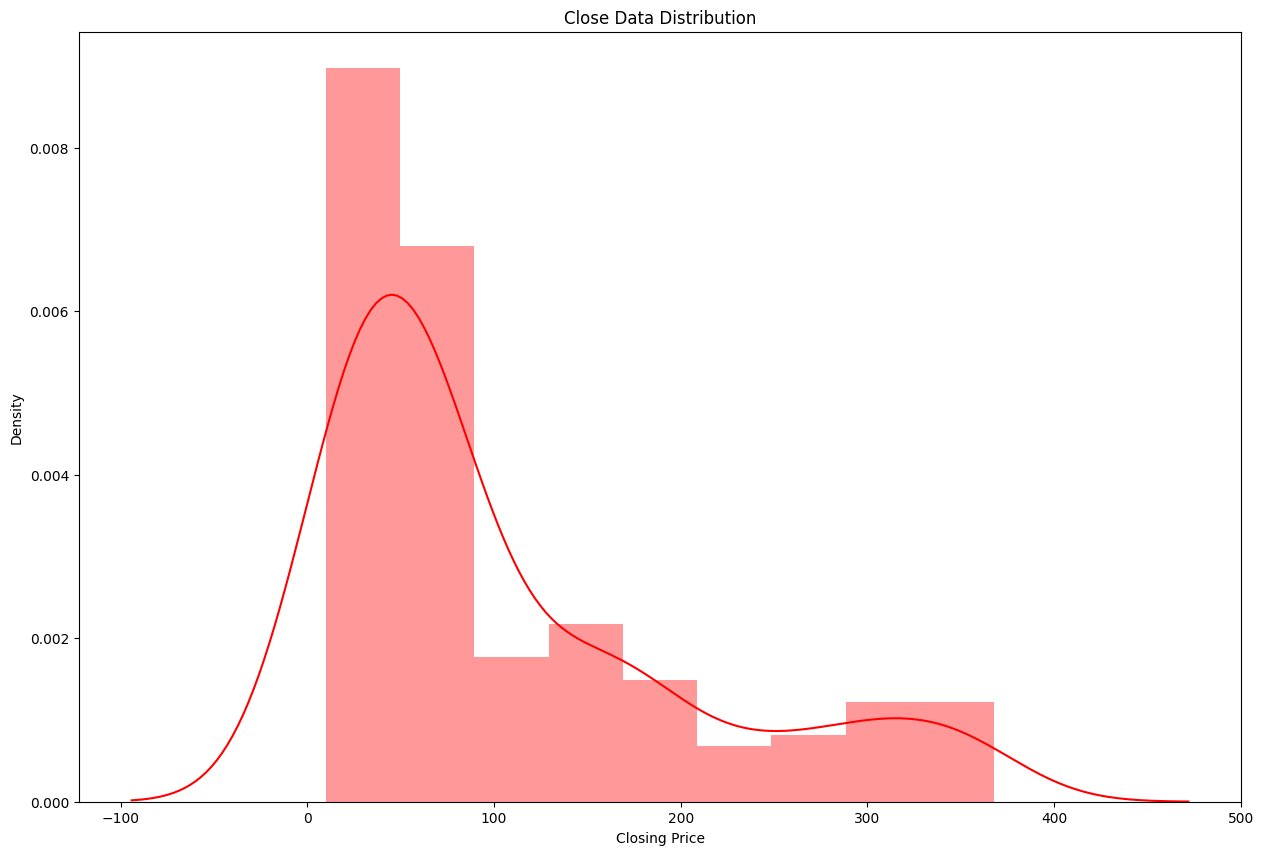

In [206]:
# Chart - 2 visualization code

# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.distplot(Stock_Data['Close'],color="red")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

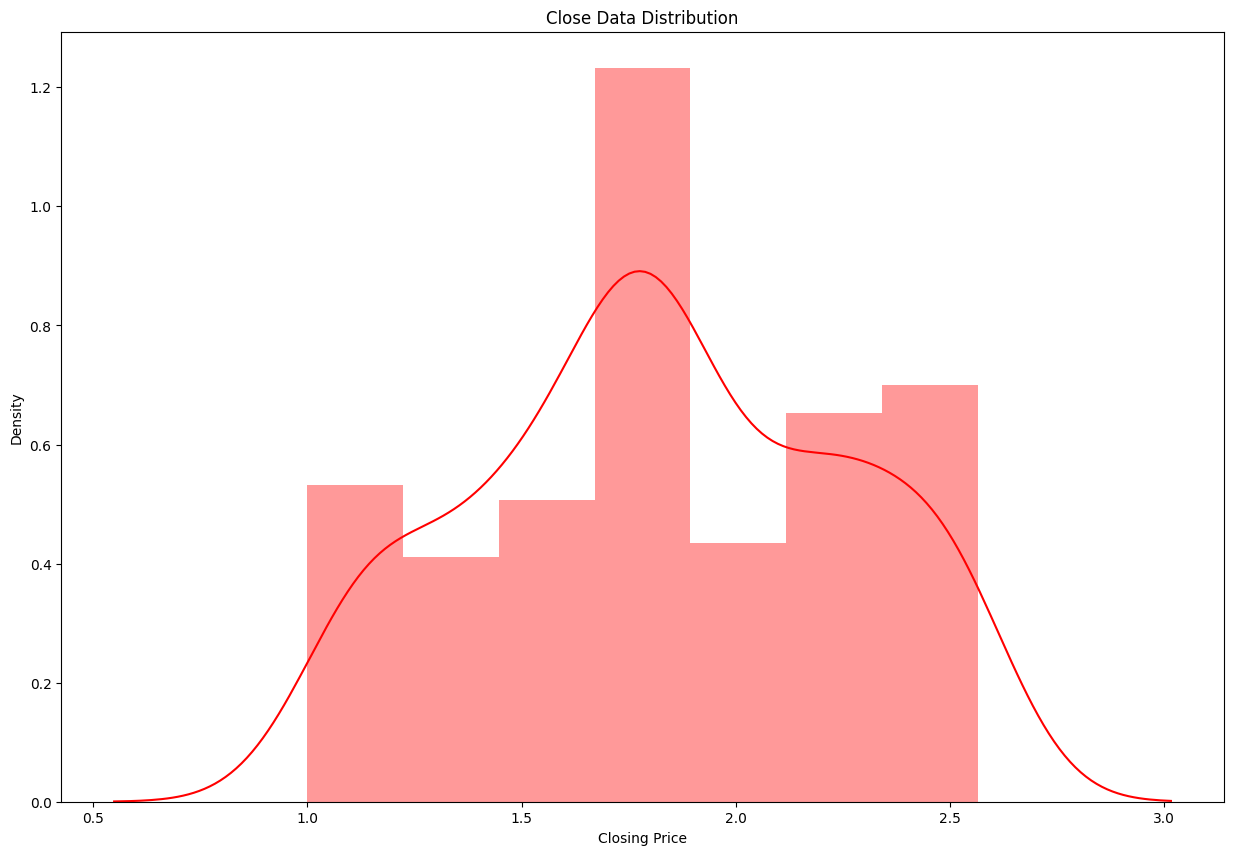

In [207]:
# Chart - 3 visualization code

# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(Stock_Data['Close']),color="red")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

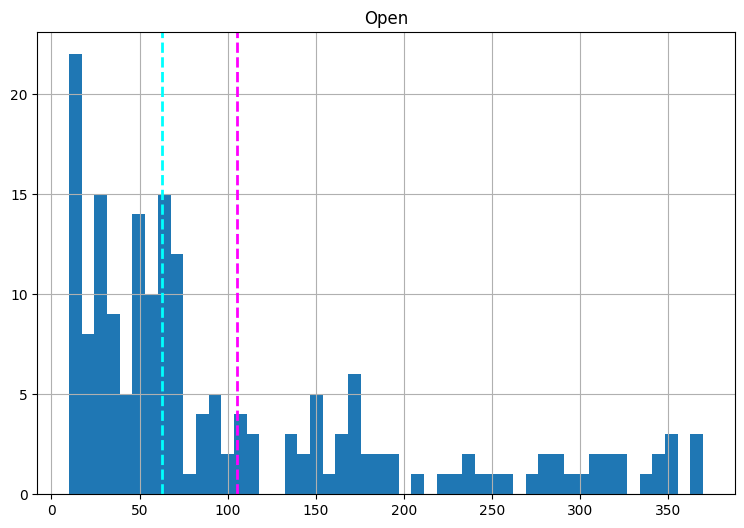

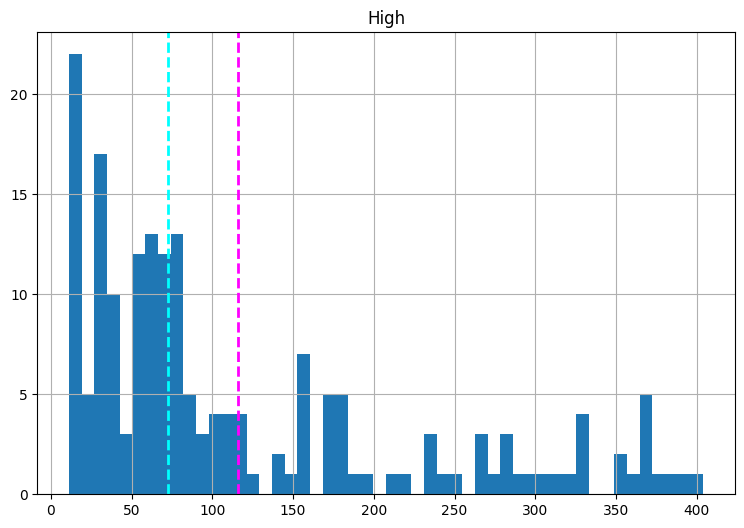

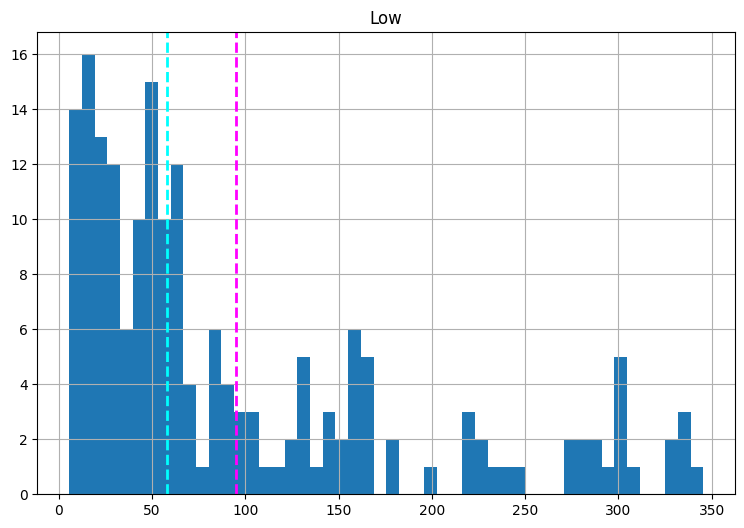

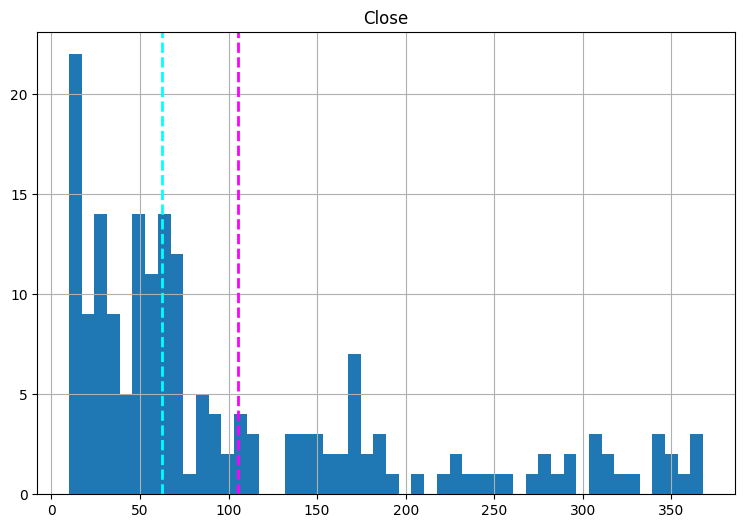

In [208]:
# Chart - 4 visualization code

# Check for skewness in the dataset
numeric_features = Stock_Data.describe().columns
for col in numeric_features[3:7]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = Stock_Data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

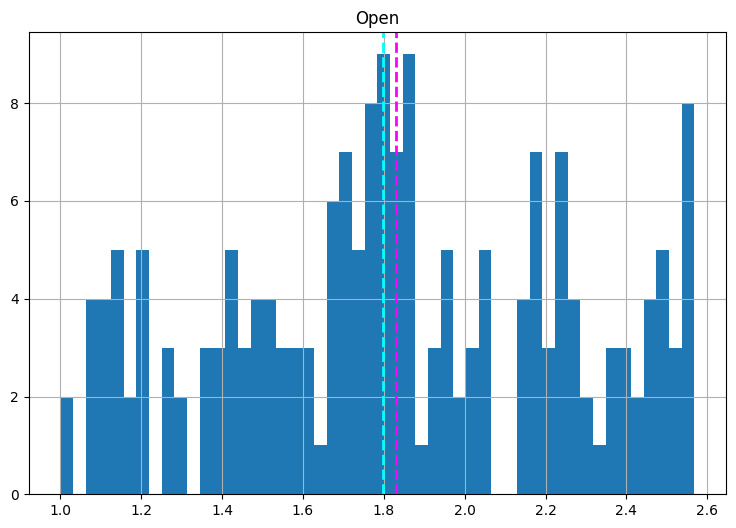

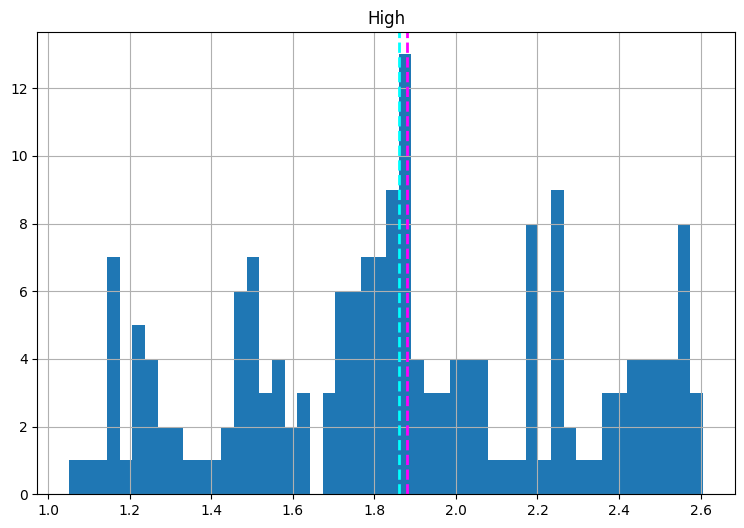

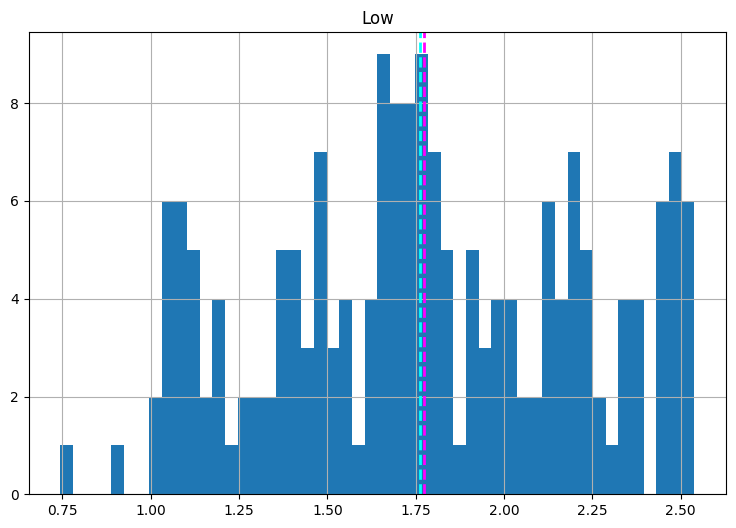

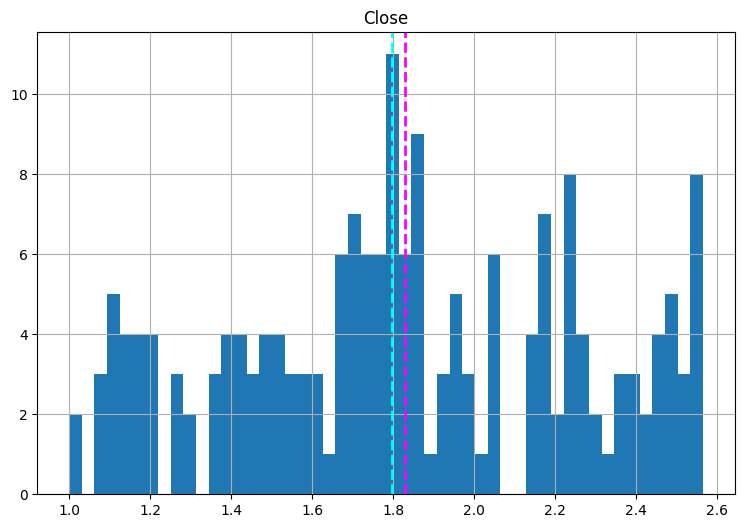

In [209]:
# Chart - 5 visualization code

numeric_features = Stock_Data.describe().columns
for col in numeric_features[3:7]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(Stock_Data[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# ***Bivariate Analysis***

#### Chart - 6

In [210]:
# Chart - 6 visualization code

fig = px.line(Stock_Data, Stock_Data['Date'], Stock_Data['Close'], title='Yearly Closing Price')
fig.update_layout(xaxis=dict(title='Year'), yaxis=dict(title='Close'))
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

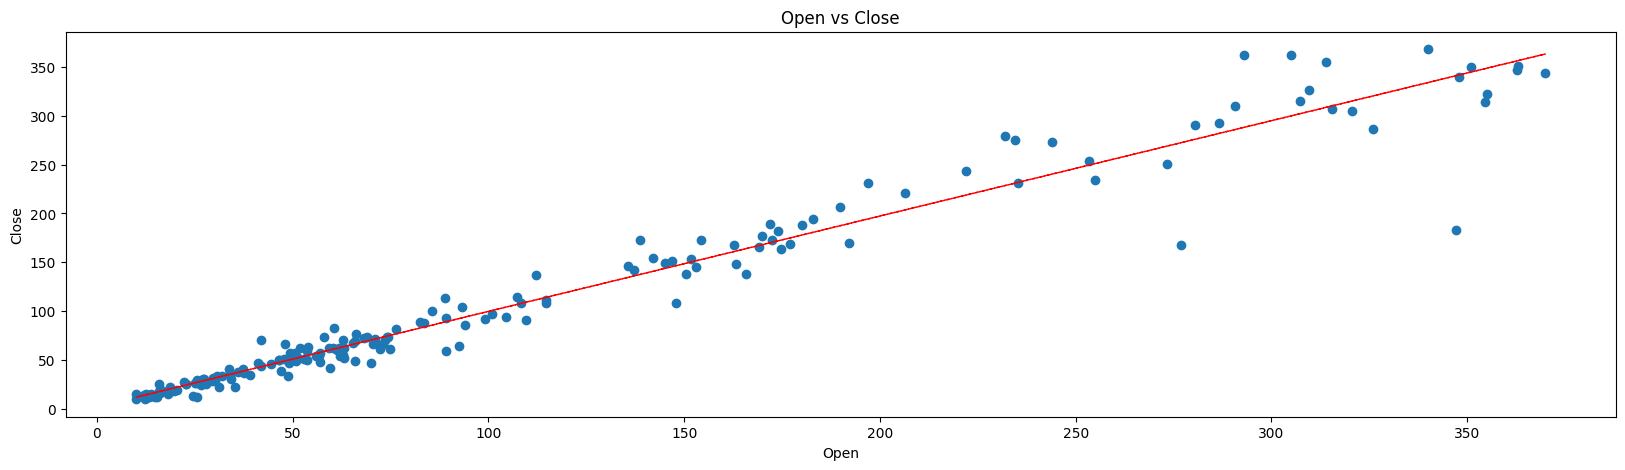

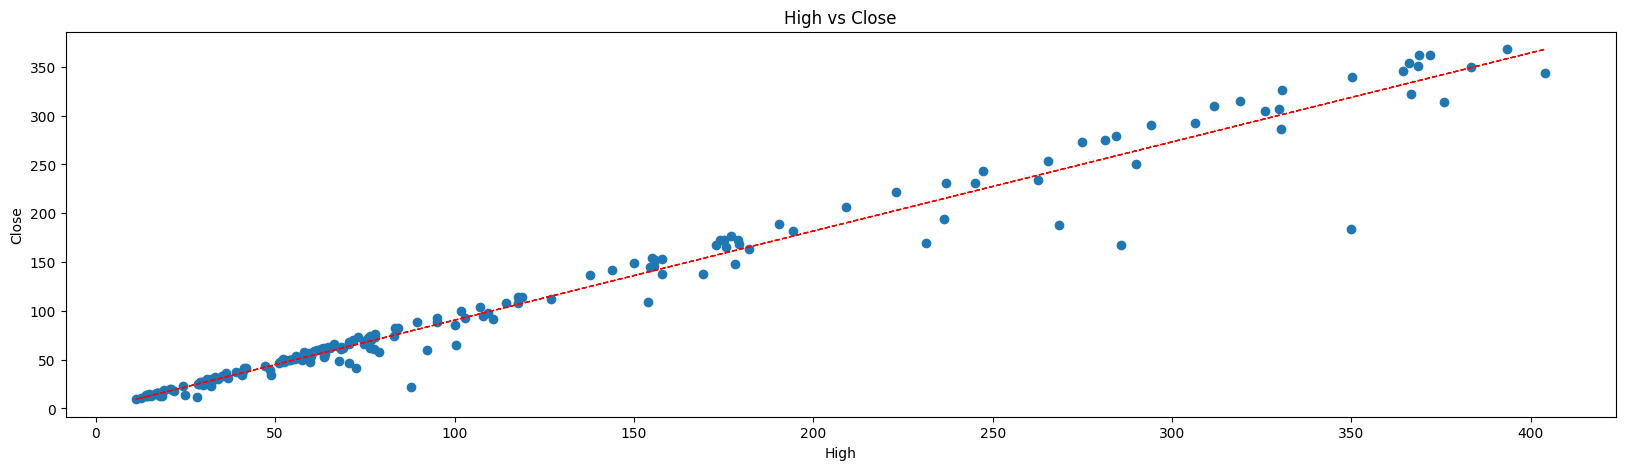

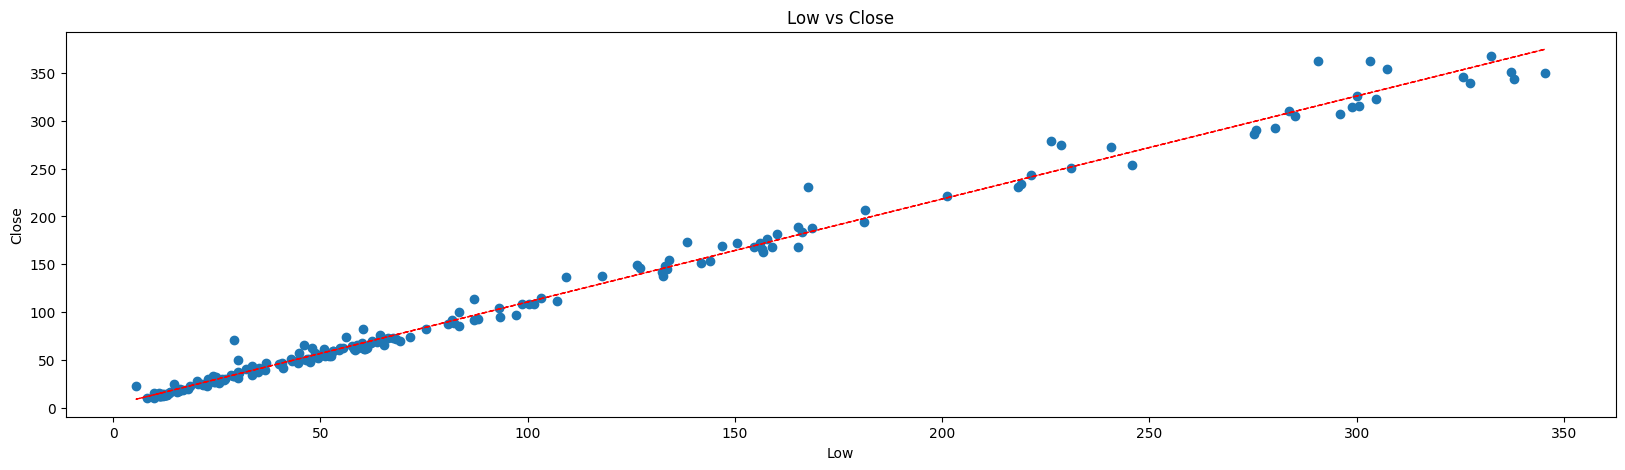

In [211]:
# Chart - 7 visualization code

# scatter plot to see the relationship between dependent & independent variables
for col in Stock_Data.describe().columns[3:6]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(Stock_Data[col], Stock_Data['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(Stock_Data[col], Stock_Data['Close'], 1)
  y_hat = np.poly1d(z)(Stock_Data[col])
  plt.plot(Stock_Data[col], y_hat, "r--", lw=1)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - CORRELATION HEATMAP

In [212]:
# Chart - 8 visualization code

df = Stock_Data.drop(['Day', 'Month', 'Year'], axis=1)
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


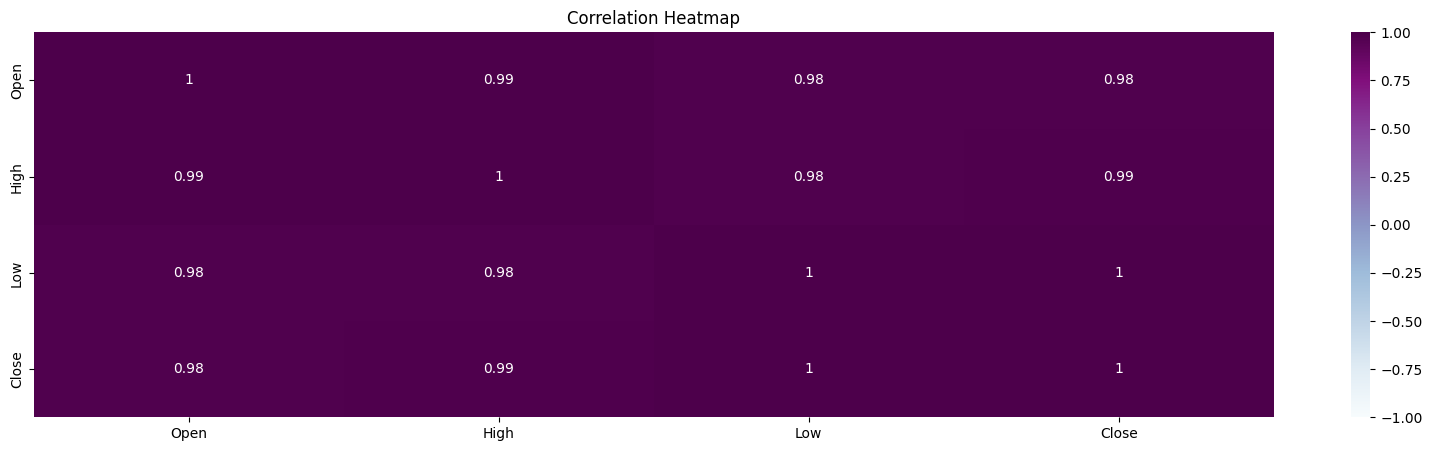

In [213]:
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
corr = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BuPu', annot=True )

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - PAIR PLOT

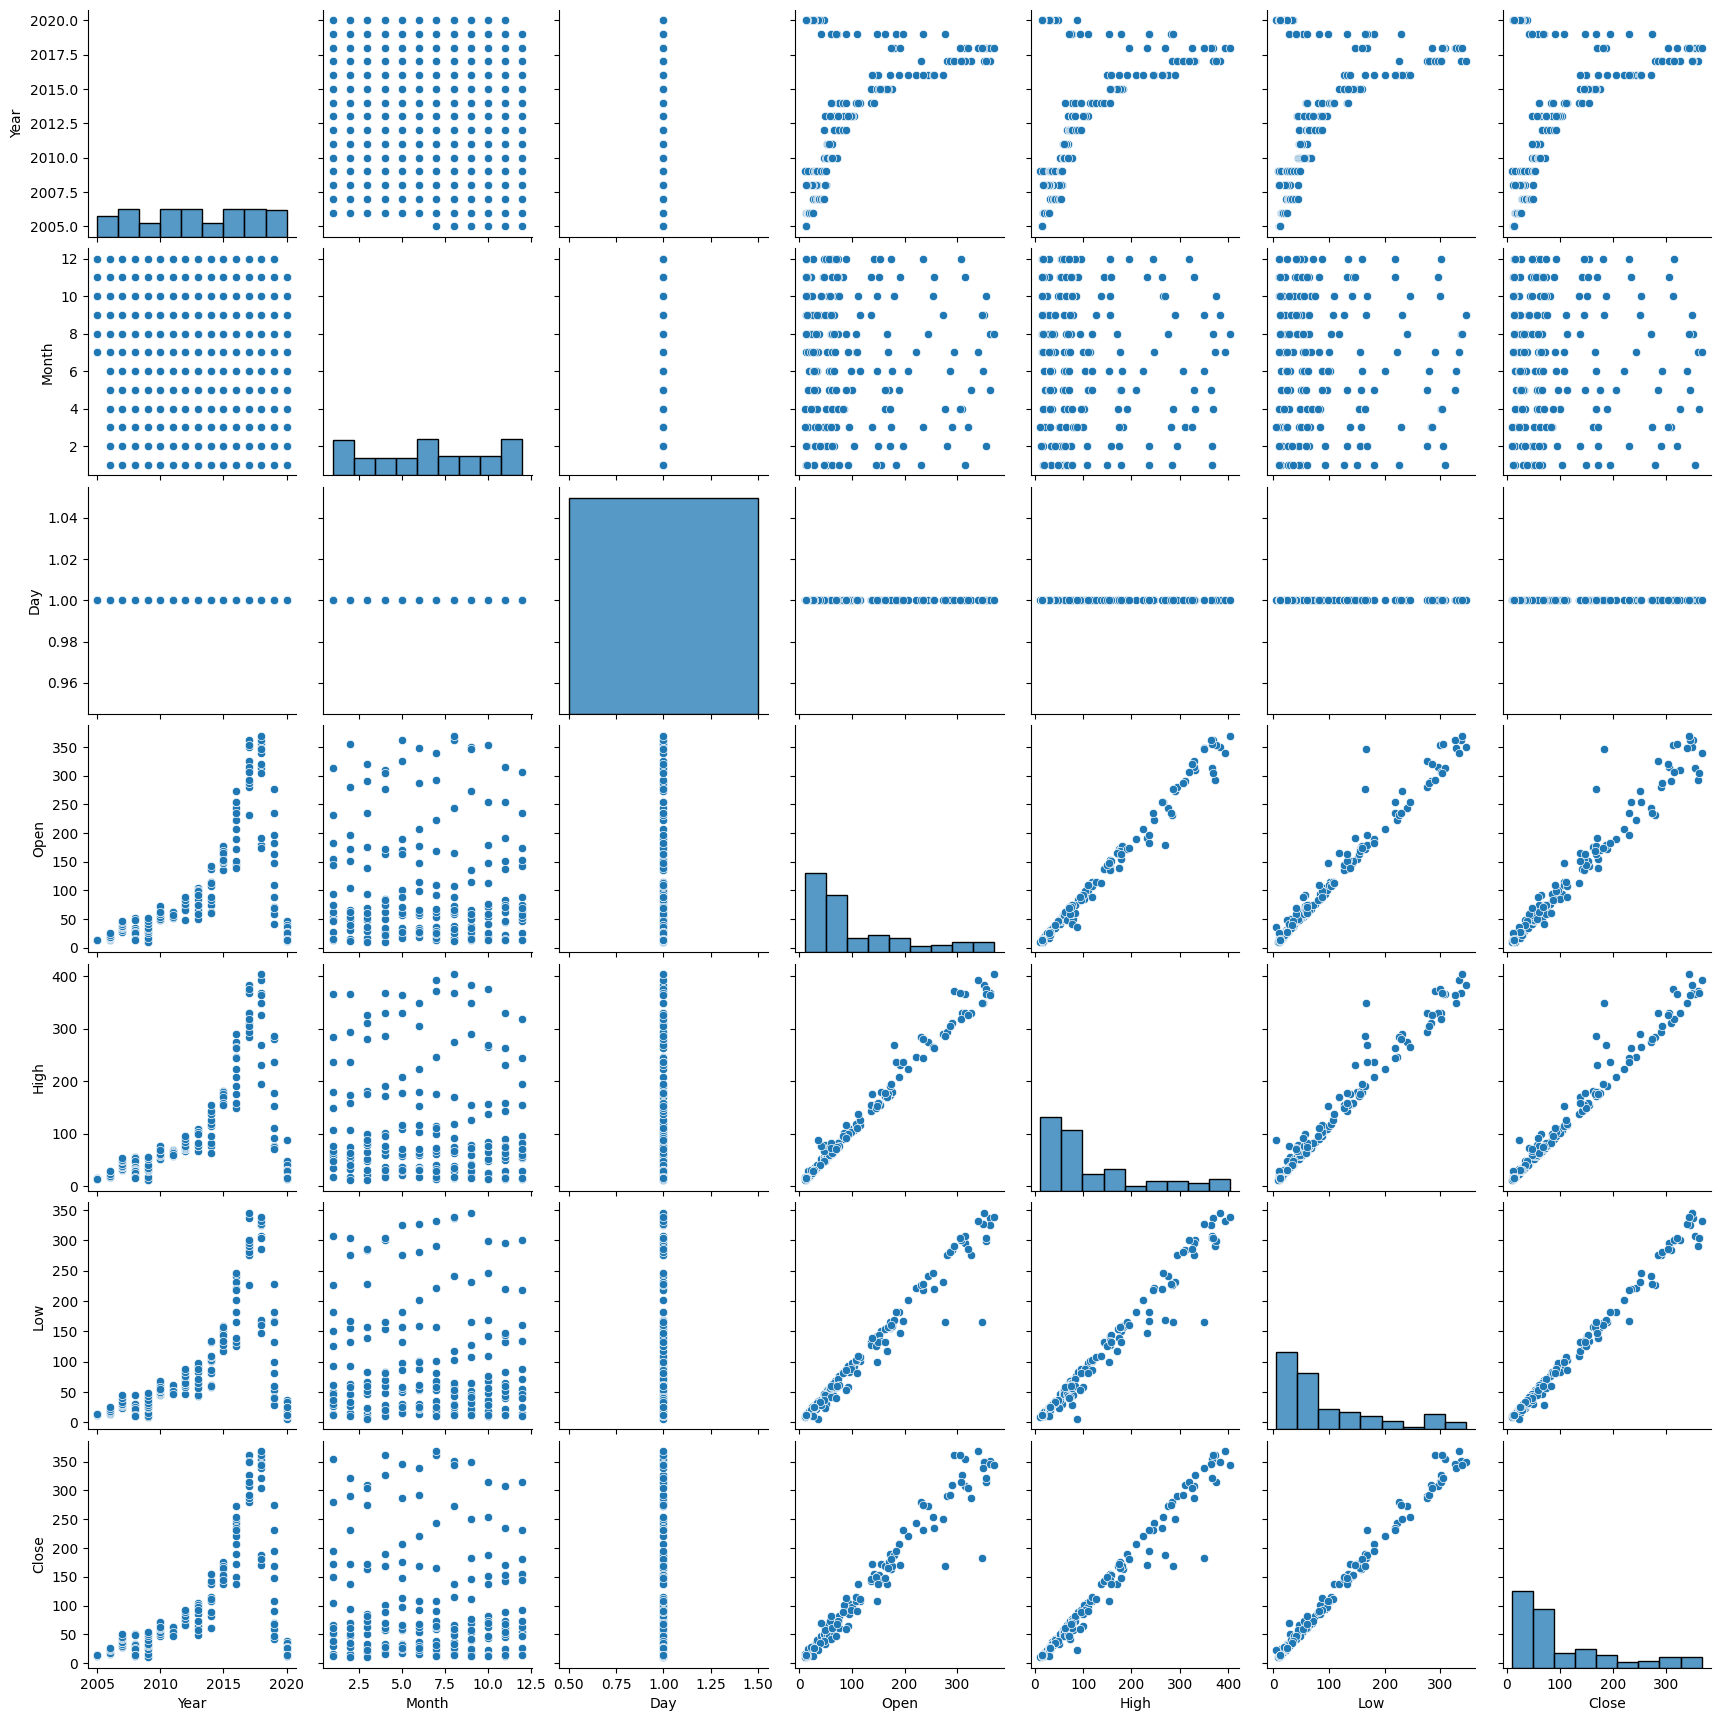

In [214]:
# Chart - 9 visualization code

sns.pairplot(Stock_Data)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### ***As per the charts on closing price discussed above, I will perform Hypothesis Testing on Closing price of YES Bank.***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

As discused above,

NULL HYPOTHESIS (Ho) = 105.20

ALTERNATE HYPOTHESIS (H1) != 105.20

TYPE OF TEST = 2 TAILED TEST

#### 2. Perform an appropriate statistical test.

In [215]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)


# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
    
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

In [216]:
# Perform Statistical Test to obtain P-Value
hypo_1=Stock_Data['Close']


# Getting the required parameter values for hypothesis testing
hypothesis_number = 30
sample_mean = hypo_1.mean()
size = len(hypo_1)
std=(variance(hypo_1))**0.5

In [217]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)


# Getting P - Value
p = p_value(z=z,tailed='d',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col='Close')


# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test(Two Tailed Test) as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.

##### Why did you choose the specific statistical test?

Please refer Chart 3 and Chart 5 for better understanding and data visualization.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [218]:
# Handling Missing Values & Missing Value Imputation (Already discussed above in EDA)

Stock_Data.isnull().sum()


Date     0
Year     0
Month    0
Day      0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

### There are no such Missing Values or Null Values in dataset.



### 2. Handling Outliers

In [219]:
Stock_Data.shape

(185, 8)

In [220]:
''' Detection '''
# IQR METHOD
# Calculate the upper and lower limits
Q1 = Stock_Data['Close'].quantile(0.25)
Q3 = Stock_Data['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_fence= Q1 - 1.5*IQR
upper_fence= Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(Stock_Data['Close']>=upper_fence)[0]
lower_array = np.where(Stock_Data['Close']<=lower_fence)[0]
 
# Removing the outliers
Stock_Data.drop(index=upper_array, inplace=True)
Stock_Data.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", Stock_Data.shape)

New Shape:  (176, 8)


##### What all outlier treatment techniques have you used and why did you use those techniques?

To identify outliers, refer Chart 1 (BOX PLOT). Already mentioned in EDA. 

Here I used Interquartile Range (IQR) Method because the data is skewed. Refere Chart 2 in EDA for better understanding and data visualization.

Though the dataset is small so, double checked manually in "data_YesBank_StockPrices.csv" and the outputr is correct.

### 3. Categorical Encoding

## ***No need for Categorical Encoding in the given dataset which I am working on. So, skipping this part.***

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

## ***There are no text columns in the given dataset which I am working on. So, skipping this part.***

#### 1. Expand Contraction

#### 2. Lower Casing

#### 3. Removing Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

#### 5. Removing Stopwords & Removing White spaces

#### 6. Rephrase Text

#### 7. Tokenization

#### 8. Text Normalization

#### 9. Part of speech tagging

#### 10. Text Vectorization

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [221]:
# Manipulate Features to minimize feature correlation and create new features

Stock_Data = Stock_Data.drop(['Day', 'Month', 'Year'], axis=1)
Stock_Data['OHL'] = Stock_Data[['Open', 'High', 'Low']].mean(axis=1).round(2)
Stock_Data.head()

,Date,Open,High,Low,Close,OHL
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


In [222]:
Stock_df = Stock_Data.drop(['Open', 'High', 'Low'], axis=1)
Stock_df.corr()

,Close,OHL
Close,1.000000,0.987674
OHL,0.987674,1.000000


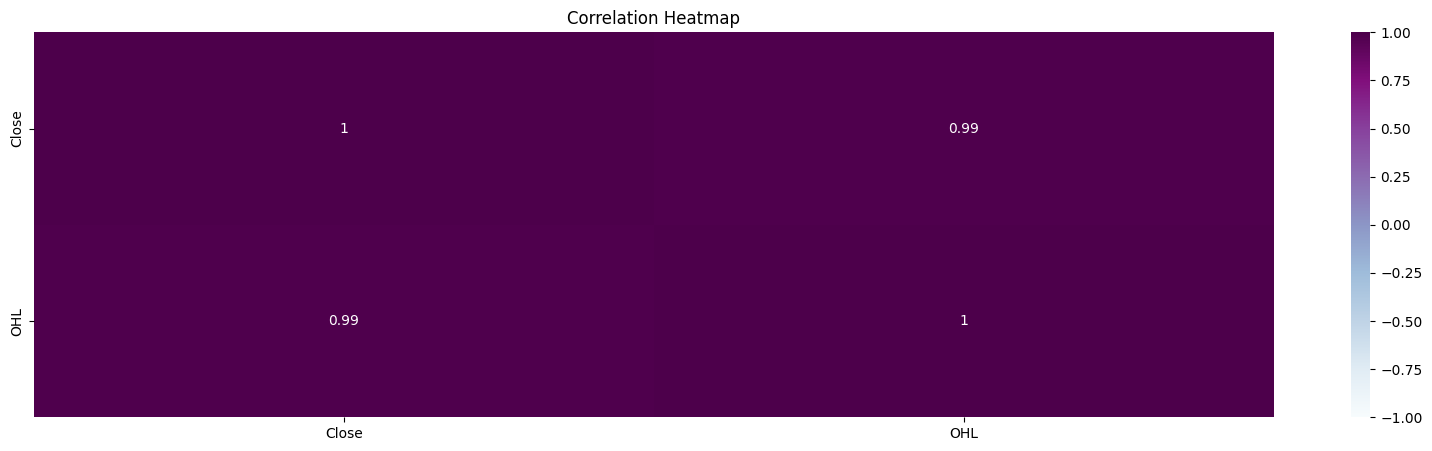

In [223]:
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
corr = sns.heatmap(Stock_df.corr(), vmin=-1, vmax=1, cmap='BuPu', annot=True) 

#### 2. Feature Selection

In [224]:
# Select your features wisely to avoid overfitting
# choose appropriate Dependent and Independent variables
Dependent_Variable = Stock_Data.dropna().Close  #Dependent Variable
Independent_Variable = Stock_Data.dropna().drop(['Date','Close','Open','High','Low'], axis=1)  #Independent Variable

In [225]:
print(Dependent_Variable)

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 176, dtype: float64


In [226]:
print(Independent_Variable)

       OHL
0    12.75
1    13.34
2    13.54
3    13.36
4    13.37
..     ...
180  21.67
181  13.67
182  14.13
183  13.14
184  13.17

[176 rows x 1 columns]


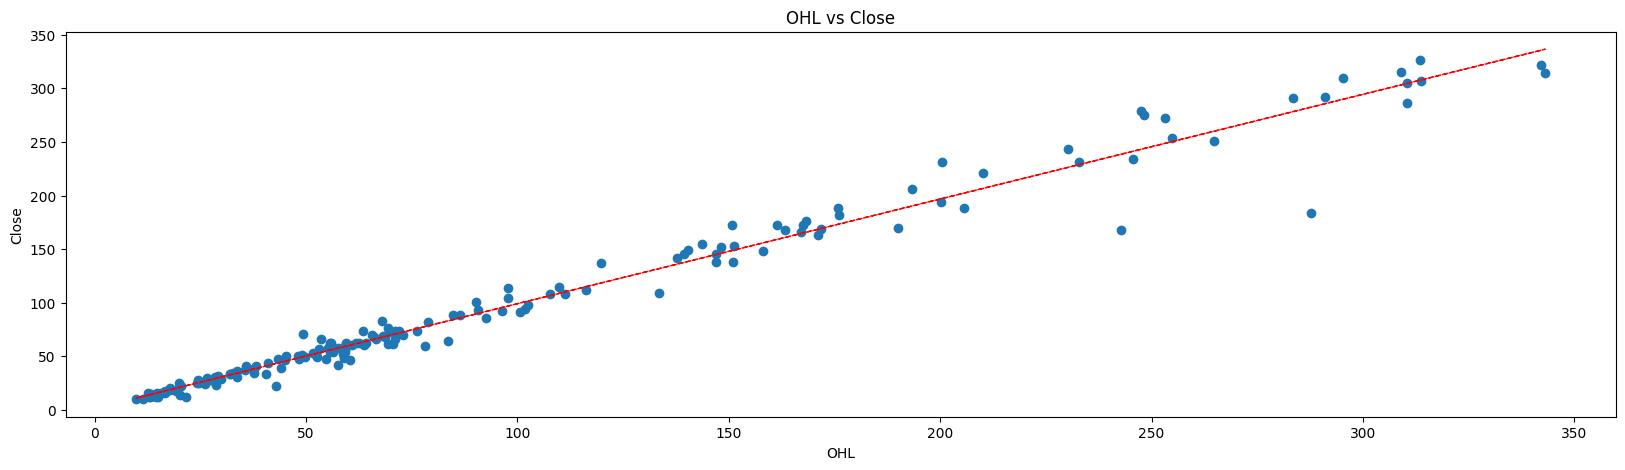

In [227]:
# scatter plot to see the relationship between dependent & independent variables

fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plt.scatter(Stock_Data['OHL'], Stock_Data['Close'])
plt.xlabel('OHL')
plt.ylabel('Close')
ax.set_title('OHL vs Close')
z = np.polyfit(Stock_Data['OHL'], Stock_Data['Close'], 1)
y_hat = np.poly1d(z)(Stock_Data['OHL'])
plt.plot(Stock_Data['OHL'], y_hat, "r--", lw=1)
plt.show()
     

##### What all feature selection methods have you used  and why?

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [228]:
# Transform Your data

from sklearn.preprocessing import StandardScaler

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [229]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 7. Data Splitting

In [230]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### What data splitting ratio have you used and why? 

Answer Here.

### 8. Data Scaling

In [231]:
#Scaling the data.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##### Which method have you used to scale you data and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [232]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [233]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr.fit(X_train, y_train)

# Predict on the model
lr_y_pred = lr.predict(X_test)

In [246]:
lr.score(X_train, y_train)

0.9804457036919833

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [234]:
# Visualizing evaluation Metric Score chart

lr_mae = round(mean_absolute_error(y_test, lr_y_pred),2)
print('mean absolute error: {}\n'.format(lr_mae))
lr_mse = round(mean_squared_error(y_test, lr_y_pred),2)
print('mean squared error: {}\n'.format(lr_mse))
lr_rmse = round(np.sqrt(lr_mse),2)
print('root mean squared error: {}\n'.format(lr_rmse))
lr_r2 = round(r2_score(y_test, lr_y_pred),2)
print('r2_score: {}\n'.format(lr_r2))
lr_r2_adjusted = round(1-(1-r2_score(10**(y_test), 10**(lr_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
print('adjusted_r2_score: {}\n'.format(lr_r2_adjusted))
lr_mape = round(mean_absolute_percentage_error(lr_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(lr_mape))


mean absolute error: 0.05

mean squared error: 0.0

root mean squared error: 0.0

r2_score: 0.98

adjusted_r2_score: 0.98

mean absolute percentage error: 0.03





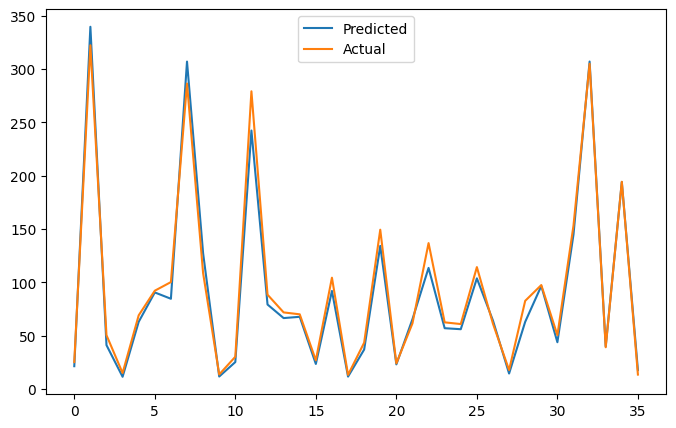

In [235]:
plt.figure(figsize=(8,5))
plt.plot(10**(lr_y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

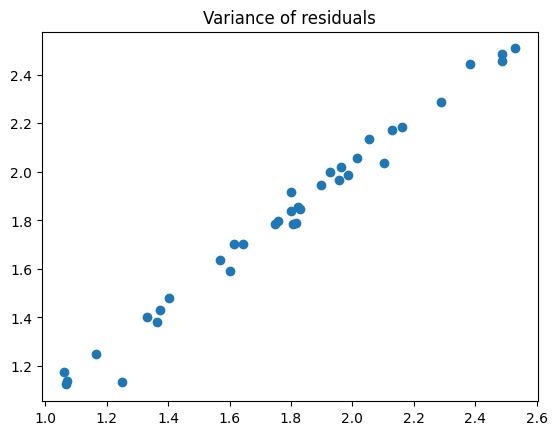

In [236]:
# Check for homoscadacity
plt.scatter(lr_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [237]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [238]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [239]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [240]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [241]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [242]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [243]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [244]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***